In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.signal
import seaborn as sns
import os

os.chdir('E:\\Google Drive\\kaggle\\03-facebook\\data')


In [4]:
print('Reading train and test data')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Reading train and test data


In [5]:
print('Calculate hour, weekday, month and year for train and test')
train['hour'] = (train['time']//60)%24+1 # 1 to 24
train['weekday'] = (train['time']//1440)%7+1
train['month'] = (train['time']//43200)%12+1 # rough estimate, month = 30 days
train['year'] = (train['time']//525600)+1 

test['hour'] = (test['time']//60)%24+1 # 1 to 24
test['weekday'] = (test['time']//1440)%7+1
test['month'] = (test['time']//43200)%12+1 # rough estimate, month = 30 days
test['year'] = (test['time']//525600)+1

Calculate hour, weekday, month and year for train and test


Kdes for weekday Vs hour for 6 place ids with the highest counts.  
The plots show a preference for certain hours and weekdays for each place id.   
Maybe weekends and weekdays and holidays can be separated if more place ids are analyzed.

In [6]:
print('group by place_id and get count')
places = train[['place_id', 'time']].groupby('place_id').count()
places.rename(columns={'time': 'count'}, inplace=True)
places.head()

group by place_id and get count


,count
place_id,
1000015801,78
1000017288,95
1000025138,563
1000052096,961
1000063498,60


plot weekday Vs hour for 6 place_ids with highest counts


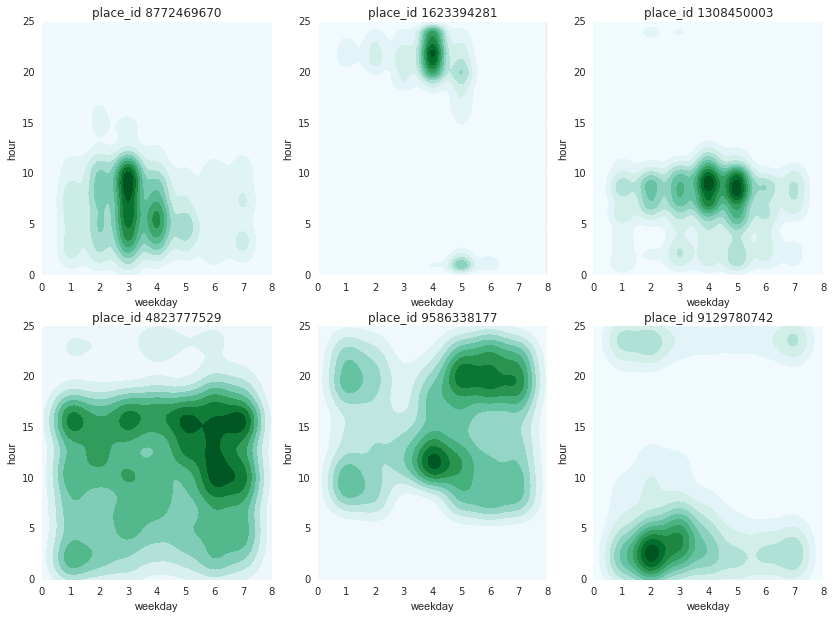

In [7]:
places.rename(columns={'time': 'count'}, inplace=True)

print('plot weekday Vs hour for 6 place_ids with highest counts')
plt.figure(1, figsize=(14,10))
placeindex = places['count'].sort_values(ascending=False)[:6]
for (i, placeid) in enumerate(placeindex.index):
    ax = plt.subplot(2,3,i+1)
    df_place = train.query('place_id == @placeid')
    # df_place = train.query('place_id == @placeid and year==1') # to separate by year      
    sns.kdeplot(df_place.weekday, df_place.hour, shade=True, ax = ax)
    plt.title("place_id " + str(placeid)) 
    ax.set(xlim=(0, 8))
    ax.set(ylim=(0, 25))

plot weekday Vs month for 6 place_ids with highest counts


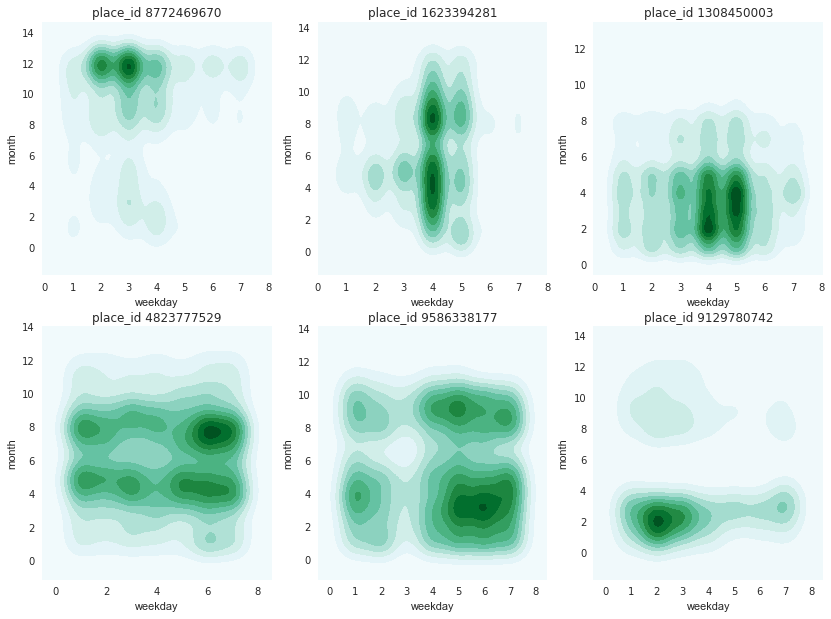

In [8]:
print('plot weekday Vs month for 6 place_ids with highest counts')
plt.figure(2, figsize=(14,10))
placeindex = places['count'].sort_values(ascending=False)[:6]
for (i, placeid) in enumerate(placeindex.index):
    df_place = train.query('place_id == @placeid and year==1')
    ax = plt.subplot(2,3,i+1)
    sns.kdeplot(df_place.weekday, df_place.month, shade=True, ax=ax)
    plt.title("place_id " + str(placeid)) 

We can see the month to month changes in the above plots for each place id.  
Some businesses seem to be highly seasonal.

Next, let's plot a very small subset of train and test data and compare the kdes.  
This is just a confirmation that the test data is lining up well with the train data

plot a small XY subset of train and test data (overlaid)
train data is subset by month >=7 for first year to match test data timeperiod for second year


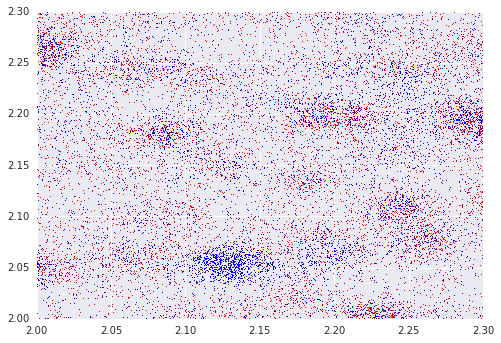

In [9]:
print('plot a small XY subset of train and test data (overlaid)' )      
xmin, xmax = 2,2.3
ymin, ymax = 2,2.3

print('train data is subset by month >=7 for first year to match test data timeperiod for second year' )      
train_subset = train.query('( @xmin<= x <= @xmax) and ( @ymin<=y<= @ymax) and (year == 1) and (month >=7)')
test_subset = test.query('( @xmin<= x <= @xmax) and ( @ymin<=y<= @ymax)')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train_subset['x'], train_subset['y'], s=1, c='r', marker="s", label='first', edgecolors='none')
ax1.scatter(test_subset['x'], test_subset['y'], s=1, c='b', marker="s", label='first', edgecolors='none')
ax1.set(xlim=(xmin, xmax))
ax1.set(ylim=(ymin, ymax))
plt.show()

Above: a scatterplot of test and train data for a very small XY window

plot weekday Vs hour kdes for train and test subsets


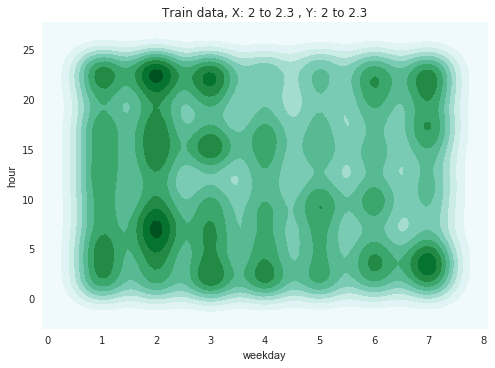

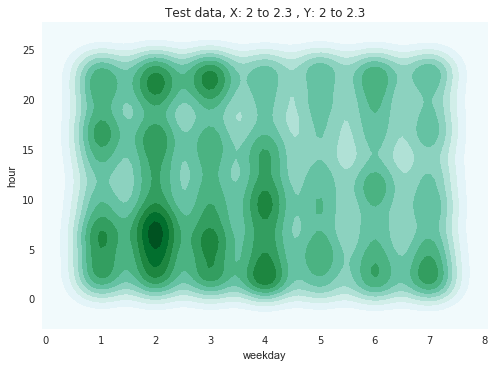

In [10]:
print('plot weekday Vs hour kdes for train and test subsets' )  
sns.kdeplot(train_subset.weekday, train_subset.hour, shade=True)
plt.title("Train data, X: "+ str(xmin) + ' to ' + str(xmax) + ' , ' + "Y: " + str(ymin) + ' to ' + str(ymax) )
plt.show()
sns.kdeplot(test_subset.weekday, test_subset.hour, shade=True)
plt.title("Test data, X: "+ str(xmin) + ' to ' + str(xmax) + ' , ' + "Y: " + str(ymin) + ' to ' + str(ymax) )
plt.show()

The plots are similar to each other, so the calculations seem to be correct

plot weekday Vs month kdes for train and test subsets


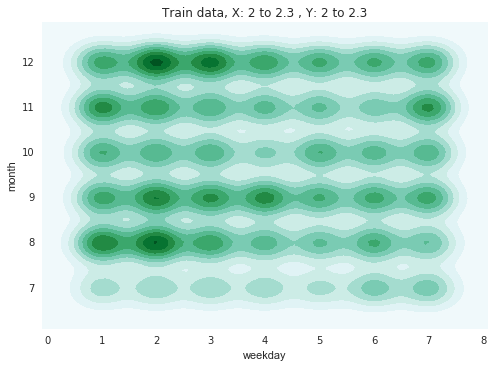

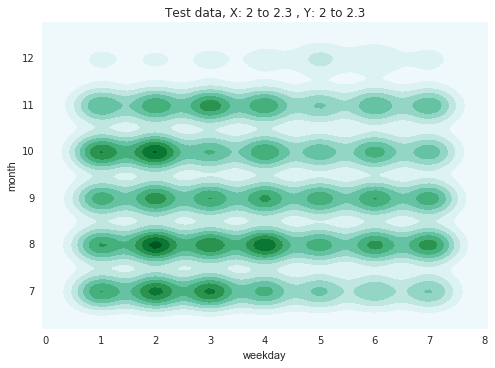

In [11]:
print('plot weekday Vs month kdes for train and test subsets' ) 
sns.kdeplot(train_subset.weekday, train_subset.month, shade=True)
plt.title("Train data, X: "+ str(xmin) + ' to ' + str(xmax) + ' , ' + "Y: " + str(ymin) + ' to ' + str(ymax) )
plt.show()
sns.kdeplot(test_subset.weekday, test_subset.month, shade=True)
plt.title("Test data, X: "+ str(xmin) + ' to ' + str(xmax) + ' , ' + "Y: " + str(ymin) + ' to ' + str(ymax) )
plt.show()  


The weekday vs month plots seem to have some differences. Not sure why. For the test dataset, the data does not cover the entire 12th month, maybe that's why the 12th month has very little events